# 2. házi feladat

A második házi feladat során egy egyszerű Multi-layer Perceptron típusú neuronhálót kell betanítani és kiértékelni egy regressziós és egy klasszifikációs feladaton a Keras könyvtár segítségével. 

A házi feladat több részfeladatból áll (A - I), melyek egymásra épülnek. Az A, B, C, D és H részfeladatokból több változat, van ezekből mindenkinek egyet-egyet kell megoldania. **Arról, hogy ki melyiket oldja meg, az alábbi linken található lista ad tájékoztatást** Neptun-kód - feladatok listája formában:

https://drive.google.com/open?id=11p0kXAiQs9poy_mebzEdGGj9-OkbY1ec

A feladat automatikus tesztelőszkripttel rendelkezik. Éppen ezért, **ne változtasd meg a notebook struktúráját**, ne szedd több részre, illetve ne módosítsd a megírt részeket, csak a megoldásaidat írd be a megfelelő helyre, különben nem fogjuk tudni értékelni. A megoldások az `# Implement your solution BELOW` és `# Implement your solution ABOVE` sorok közé írandók. Ha a megoldott részfeladatok futtatásakor az "Tester: .... OK" felirat megjelenik, _feltehetően_ jó a megoldás. A beadott házifeladatok másolásellenőrzésen esnek át. Közösen megoldott feladat esetén, csak az egyik hallgató kaphatja meg a jegyet. (A hallgatók dönthetik el egymás között.)

**!!! A feladatok megoldását, vagy az arra mutató linkeket bárhol közzétenni tilos !!!**

Elakadás esetén Canvas fórumon kérhető és nyújtható segítség, de legfeljebb olyan jellegű válasz adható hallgatói részről, hogy melyik függvényt érdemes megpróbálni, vagy például egy hasonló példához hogyan kellene a tömböt indexelni. **Akár kérdésben, akár válaszban a megoldás jelentős részét tartalmazó kódrészletet közzétenni tilos.**

**Megoldás és beküldés menete:**

A közzétett, feladatokat tartalmazó Google Colab notebook csak "view" jogosultságokkal van megosztva. Mindenkinek le kell másolnia a saját Drive-jára a notebook-ot (Google Colab file menü -> Save a copy to Drive): a másolat már szerkeszthető és futtatható lesz. **A kész megoldást tartalmazó notebook-ot le kell tölteni**  (Google Colab file menü -> Download .ipynb), **majd a Canvas-ban, a kiírt feladatnál feltölteni.** Link nem adható be, csak az .ipynb fájl.

**Határidő:** 2020. április 15., szerda, 23:59.

**Pontozás:** A házi feladat helyes megoldása feltétele a jegyszerzésnek. Az, aki az első határidőig helyes megoldást küldd be, 2 pontot kap, ami a félév végi vizsga pontszámához adódik, amennyiben az elégséges szintet a vizsga eléri (a vizsgán várhatóan 10-10 pont szükséges a végső érdemjegy eggyel történő javításához). Az első határidő után körülbelül még két hét fog rendelkezésre állni a házi feladat leadására, immár pluszpont nélkül.

Törekedj arra, hogy az implementáció vektoros módon, NumPy-ban, ciklusok és egyéb, annak megfelelő Python konstrukciók használata nélkül működjön!



Tesztelő szkript letöltése, importok.

In [1]:
# Download tester
!rm tester.py
!wget http://nipg12.inf.elte.hu:800/vavsaai/annbsc_p1_hw2/tester.py

import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.layers
import tensorflow.keras.activations
import tensorflow.keras.callbacks

import matplotlib.pyplot as plt

# import tester after importing tensorflow, to make sure correct tf version is imported
from tester import Tester


rm: cannot remove 'tester.py': No such file or directory
--2020-04-14 17:21:45--  http://nipg12.inf.elte.hu:800/vavsaai/annbsc_p1_hw2/tester.py
Resolving nipg12.inf.elte.hu (nipg12.inf.elte.hu)... 157.181.160.172
Connecting to nipg12.inf.elte.hu (nipg12.inf.elte.hu)|157.181.160.172|:800... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38173 (37K) [text/x-python]
Saving to: ‘tester.py’

tester.py           100%[===================>]  37.28K   236KB/s    in 0.2s    

2020-04-14 17:21:45 (236 KB/s) - ‘tester.py’ saved [38173/38173]



###**A**: Az adatbázis letöltése

**A/1 - A/6**: A tesztelőszkript a számodra szükséges adatbázist tölti le és a részedre kiosztott feladatok helyességét fogja tesztelni. Ehhez az alábbi kódblokk tetején, a Tester példányosításakor paraméterként a Neptun-kódodat kell megadni egy sztringként, pl: 
`tester = Tester('DK7UAQ')`

**Információ az adatbázisokról**:
Az adatbázisok a UCI Machine Learning Repository-ról származnak.
- **A/1**: Fehérborok, borászok által történt szubjektív értékelését (0-10) próbáljuk megbecsülni a bor kémiai tulajdonságai alapján. http://archive.ics.uci.edu/ml/datasets/Wine+Quality 
- **A/2**: Két portugál középiskolában a tanulók évvégi matematika jegyét (0-20) próbáljuk megbecsülni a tanulók szociális és pénzügyi háttere alapján. http://archive.ics.uci.edu/ml/datasets/Student+Performance 
- **A/3**: Lásd A/2, matematika helyett portugál nyelv tárgyból.
- **A/4**: Lásd A/2. Az A/2. és A/3.-ban használt adatbázisok esetében az input változók közt megtalálhatók a tanulók első- és második harmadévvégi osztályzata az adott tárgyból. Ezekkel nyilvánvalóan erősen korrelál az év végi jegy, így nehezíti a feladatot, ha ezeket az input változókat elhagyjuk. Az A/4 és A/5. adatbázisaiból ezek a változók hiányoznak, így jelentősen gyengébb eredmény várható.
- **A/5**: Lásd A/4, matematika helyett portugál nyelv tárgyból.
- **A/6**: Betontömbök nyomószilárdságát (~1-100 MPa) próbáljuk megbecsülni a betontömbök összetevőinek mennyiségéből, előállítási körülményeikből és korukból. http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

A tesztelőszkript letölti a szöveges formában tárolt adatbázist és elhelyezi a `content` sztringben. Alább, kiírjuk a hosszát és az első 500 karaktert is a sztringből.

A feladatod, hogy alakítsd át a `content` sztringet az adatbázis input változóit és címkéit tartalmazó tömbbé. A tömbök típusa np.float32 (lebegőpontos) típusú legyen. Az input változók értékeit helyezd el a `features` (n_mintaelem, n_valtozo) alakú tömbben, míg a címkéket a `labels` (n_mintaelem) alakú tömbben!



In [2]:
tester = Tester('AE92AW')
content = tester.get_dataset_content()

print(len(content))
print(content[:500])


41728
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G3
0;0;18;0;1;1;4;4;4;0;3;0;2;2;0;0;1;1;1;0;0;1;1;4;3;4;1;1;3;4;11
0;0;17;0;1;0;1;1;4;2;3;1;1;2;0;1;0;1;1;1;0;0;1;5;3;3;1;1;3;2;11
0;0;15;0;0;0;1;1;4;2;2;0;1;2;0;0;1;1;1;0;0;0;1;4;3;2;2;3;3;6;12
0;0;15;0;1;0;4;2;1;3;0;0;1;3;0;1;0;1;0;0;0;0;0;3;2;2;1;1;5;0;14
0;0;16;0;1;0;3;3;2;2;0


In [9]:
# implement your solution BELOW

data = np.char.split(content, '\n')
tmp = np.char.split(data.flat[0], ';')
tmp = tmp[1:]
tmp = np.hstack(tmp)
labels = tmp[30::31]
labels = np.array(labels, dtype="float32")
tmp = np.delete(tmp, np.arange(30, tmp.size, 31))
tmp = tmp[:-1]
tmp = np.array(tmp, dtype="float32")
features = tmp.reshape((649, 30))
# implement your solution ABOVE

tester.test('dataset_shape', features, labels)

Tester: Dataset preparation OK


## **B**: Tanító-, validációs- és teszthalmaz szétválasztása

Keverd meg véletlenszerűen a mintaelemeket a `features` és `labels` tömbökben (természetesen a két tömb permutálása legyen azonos). Ez azért szükséges, mert az adatbázisban az elemek lehet, hogy rendezettek pl. a címkék szerint. Ez azt eredményezné, hogy a szétválasztott halmazokban jelentősen különbözne a címkék eloszlása. 

Ezt követően válaszd szét a tömböket tanító-, validációs- és teszthalmazra!

A szétválasztás történjen az alábbi arányokkal:
- **B/1**.: 70% / 15% / 15%
- **B/2**: 60% / 20% / 20%
- **B/3**: 50% / 25% / 25%

A halmazokat tartalmazó három-három input- és címketömb változókat nevezd el `x_unnorm_train`, `x_unnorm_val`, `x_unnorm_test`, `y_train`, `y_val`, `y_test`-nek sorrendben.

In [10]:
# implement your solution BELOW

indices = np.random.permutation(649)
labels = labels[indices]
features = features[indices]

x_unnorm_train = features[0:int(len(features) * 0.7)]
x_unnorm_val = features[int(len(features) * 0.7):int(len(features) * 0.7)+int(len(features) * 0.15)]
x_unnorm_test = features[int(len(features) * 0.7)+int(len(features) * 0.15):]

y_train = labels[0:int(len(labels) * 0.7)]
y_val = labels[int(len(labels) * 0.7):int(len(labels) * 0.7)+int(len(labels) * 0.15)]
y_test = labels[int(len(labels) * 0.7)+int(len(labels) * 0.15):]

# implement your solution ABOVE

tester.test('dataset_split', x_unnorm_train, x_unnorm_val, x_unnorm_test,\
                             y_train, y_val, y_test)

Tester: Dataset split OK


## **C**: Az input változók azonos nagyságrendre hozása

A változók azonos nagyságrendre hozása az alábbi technikával történjen:
- **C/1**: sztenderdizáció (0 átlag, 1 szórás)
- **C/2**: min-max skálázás (0 minimum, 1 maximum)

A változókat egymástól függetlenül kell skálázni. A skálázáshoz szükséges átlagot és szórást / minimumot és maximumot a tanítóhalmazon számold ki, majd alkalmazd őket a validációs és a teszt halmazra. Ez azért szükséges, mert a teszthalmazról azt feltételezzük, hogy ismeretlen a betanítás során, pontosan azért, hogy semmi esetre se tudjuk hozzáigazítani a tanított modellünket.

A skálázott halmazokat tartalmazó három inputtömb változót nevezd el `x_train`, `x_val`, `x_test`-nek sorrendben.

In [11]:
# implement your solution BELOW

def std_normalization(data):
    data = np.asarray(data, dtype=np.float32)
    epsilon = 0.0000001
    x_mean = np.mean(data, axis = 0)
    x_std = np.std(data, axis = 0)
    x_norm = (data - x_mean) / (x_std + epsilon)
    return x_norm, x_mean, x_std

def std_normalize_with_given_meanstd(data, x_mean, x_std):
    epsilon = 0.0000001
    x_norm = (data - x_mean) / (x_std + epsilon)
    return x_norm

x_train, x_mean, x_std = std_normalization(x_unnorm_train)
x_val = std_normalize_with_given_meanstd(x_unnorm_val, x_mean, x_std)
x_test = std_normalize_with_given_meanstd(x_unnorm_test, x_mean, x_std)

# implement your solution ABOVE

tester.test('dataset_rescale', x_train, x_val, x_test)

Tester: Feature rescale OK


## **D**: A regressziós neuronháló definiálása Keras-ban 

Használd a `keras.models.Sequential()` osztályt a háló definiálásához! A háló architektúráját az alábbiak alapján alakítsd ki:
- **D/1**: Kétrétegű háló, az első réteg neuronjainak száma 50, aktivációs függvénye ReLU. Az első réteg után alkalmazz dropout-ot neurononként 30%-os valószínűséggel.
- **D/2**: Négyrétegű háló, a neuronok száma rendre 20, 20, 10, aktivációs függvényük ReLU. Az egyes rétegek közé tégy dropout rétegeket, melyek 20%-os valószínűséggel nulláznak ki egy-egy elemet.
- **D/3**: Háromrétegű háló, a neuronok száma rendre 50, 30. Aktivációs függvényként használj sorban tanh-t, majd ReLU-t.

Minden esetben csak teljesen összekötött (dense) rétegeket, valamint dropout rétegeket kell használnod. Az aktivációs függvényeket a segédanyag notebook-okban látható módon, a telejesen összekötött rétegek `activation` paramétereként add meg (azaz most ne használj külön Acitvation rétegeket). A rétegek számába beleértendő a kimenetre képző, utolsó réteg is, melynek méretét a címke mérete határozza meg. Alkalmazd a tanult aktivációs függvényt az utolsó rétegen, függően a feladat típusától.
A modellt fordítsd le a `compile()` függvény segítségével: a költségfüggvény legyen a szokásos, regresszióhoz használatos átlagos négyzetes eltérés (MSE), optimizer algoritmusként pedig alkalmazd az SGD algoritmust megfelelő tanulási rátával! 
A regressziós neuronhálót tartalmazó keras.models.Sequential() típusú változót nevezd el `reg_model`-nek. 

In [12]:
# implement your solution BELOW

reg_model = tf.keras.models.Sequential()
reg_model.add(tf.keras.layers.Dense(50, activation='relu', input_dim=x_train.shape[1]))
reg_model.add(tf.keras.layers.Dropout(rate=0.3))
reg_model.add(tf.keras.layers.Dense(1))

reg_model.summary()
reg_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse', metrics=['mae'])
# implement your solution ABOVE

tester.test('reg_model_architecture', reg_model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                1550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
Tester: Regression model architecture OK


## **E**: A háló betanítása regressziós feladatra

Tanítsd be a neuronhálót a tanítóhalmazon! Használj early stopping-ot a validációs halmazzal! A tanulási rátát, epoch-ok maximális számát, a batch méretet, az early stopping `patience` paraméterét szabadon átállíthatod. Próbálgathatsz különböző kombinációkat, hogy jobb eredményt érj el.

- Rajzold ki, hogyan alakult a tanulási és validációs költség a betanítás során! Ehhez használhatod a `matplotlib` könyvtárat, példát találsz az MLP segédanyag notebookokban. 
- A négyzetes (MSE) költség mellett az átlagos abszolút hiba (Mean Absolute Error, MAE) tanító- és validációs halmazon történő alakulását is rajzold ki egy másik grafikonon! A grafikonok y tengelyének megjelenített értékhatárait úgy állítsd be, hogy mindegyik idősor látható legyen és könnyen ki lehessen venni a költségek alakulását a tanítás vége felé is!
- Végül, számold ki a betanított modell négyzetes hibáját és az átlagos abszolút hibát a teszthalamzon, majd add értékül ezeket az értékeket a `test_mse` és `test_mae` változóknak!



Epoch 1/200
8/8 [==============================] - 0s 15ms/step - loss: 74.8850 - mae: 7.9805 - val_loss: 17.6895 - val_mae: 3.1197
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 15.5802 - mae: 3.2015 - val_loss: 11.8874 - val_mae: 2.5968
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 12.7519 - mae: 2.7910 - val_loss: 8.7775 - val_mae: 2.1213
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 10.0618 - mae: 2.4975 - val_loss: 8.4003 - val_mae: 2.0953
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 10.5442 - mae: 2.5940 - val_loss: 7.6470 - val_mae: 1.9730
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 13.1551 - mae: 2.5236 - val_loss: 7.6082 - val_mae: 2.0725
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 10.5883 - mae: 2.5067 - val_loss: 7.5824 - val_mae: 2.0093
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 12.6133 - mae: 2

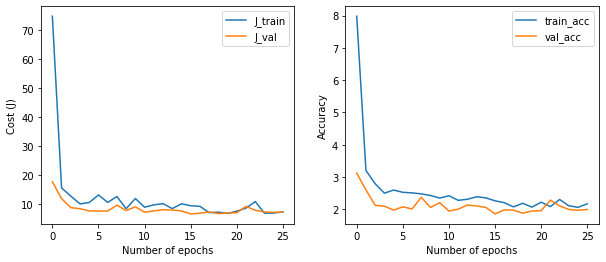

In [13]:
# implement your solution BELOW

earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',\
                                                       patience=10,  restore_best_weights=True)
history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),\
                        batch_size=64, epochs=200, callbacks=[earlystopping_callback])
#print(history.history.keys())


tr_losses = np.array(history.history['loss'])
val_losses = np.array(history.history['val_loss'])

tr_accuracy = np.array(history.history['mae'])
val_accuracy = np.array(history.history['val_mae'])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(tr_losses, label="J_train")
plt.plot(val_losses, label="J_val")
plt.xlabel("Number of epochs")
plt.ylabel("Cost (J)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tr_accuracy, label="train_acc")
plt.plot(val_accuracy, label="val_acc")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

test_mse, test_mae = reg_model.evaluate(x_test, y_test, verbose=0)

# implement your solution ABOVE

tester.test('reg_model_learning', test_mse, test_mae)

## **F**: A regressziós adatbázis átalakítása klasszifikációs adatbázissá

Alakítsd át a regressziós adatbázist, hogy alkalmas legyen klasszifikációs feladathoz! Alakíts ki három kategóriát úgy, hogy a regressziós adatbázis címkéinek intervallumán felveszel két küszöbértéket. Az első kategóriába a kisebb küszöbérték alatti, a másodikba a két küszöbérték közti és a harmadikba a nagyobb küszöbérték feletti címkével rendelkező mintaelemek kerüljenek. 

Tehát, például ha a regressziós adatbázis címkéi 3 és 8 közt vannak, akkor a két küszöbértéknek választhatjuk az 5.2-t és a 6.1-et. Ekkor az 1. kategóriába az 5.2-nél kisebb címkéjű elemek, a 2. kategóriába az 5.2 és 6.1 közti címkéjű elemek és a 3. kategóriába a 6.1-nél nagyobb címkéjű elemek kerülnek. Azonos címkéjű elemek mindenképpen azonos kategóriába kell, hogy kerüljenek.

Válaszd ki a két küszöbértéket úgy, hogy a három kategóriába **megközelítőleg** ugyanannyi elem kerüljön! Hozd létre az új kategóriacímkéket az `y_train`, `y_val`, `y_test` tömbökből. Kerüljenek ezek a `y_cat_train`, `y_cat_val`, `y_cat_test` változókba!



In [14]:
# implement your solution BELOW

y_cat_train = np.where(y_train < 10.9, 0, y_train)
y_cat_train = np.where(np.logical_and(y_train > 10.9, y_train < 13.9), 1, y_cat_train)
y_cat_train = np.where(y_train > 13.9, 2, y_cat_train)

y_cat_val = np.where(y_val < 10.9, 0, y_val)
y_cat_val = np.where(np.logical_and(y_val > 10.9, y_val < 13.9), 1, y_cat_val)
y_cat_val = np.where(y_val > 13.9, 2, y_cat_val)

y_cat_test = np.where(y_test < 10.9, 0, y_test)
y_cat_test = np.where(np.logical_and(y_test > 10.9, y_test < 13.9), 1, y_cat_test)
y_cat_test = np.where(y_test > 13.9, 2, y_cat_test)

# implement your solution ABOVE

tester.test('cl_dataset', y_cat_train, y_cat_val, y_cat_test)

Tester: Classification dataset creation OK


## **G**: Kategóriacímkék átalakítása one-hot kódolásra

Kettőnél több kategóriás (multi-class) klasszifikációnál minden kategóriához egy valószínűséget becslünk, azaz a háló kimenete akkora méretű, ahány kategóriánk van. Így tehát az igazi címkéink ugyanekkora méretű one-hot kódolású vektorok lesznek, ezeket címkevektorokként használva fogjuk betanítani a hálót.

Készítsd el a one-hot kódolású címkevektor tömböket a kategóriacímkéket tartalmazó `y_cat_train`, `y_cat_val`, `y_cat_test` tömbökből! Az új tömbök kerüljenek a `y_onehot_train`, `y_onehot_val`, `y_onehot_test` változókba! A tömbök alakja így (n_samples, n_categories), típusuk legyen `np.float32`!


In [15]:
# implement your solution BELOW

y_cat_train = y_cat_train.astype(int)
y_onehot_train = np.zeros((y_cat_train.size, int(np.max(y_cat_train))+1))
y_onehot_train[np.arange(y_cat_train.size), y_cat_train] = 1

y_cat_val = y_cat_val.astype(int)
y_onehot_val = np.zeros((y_cat_val.size, int(np.max(y_cat_val))+1))
y_onehot_val[np.arange(y_cat_val.size), y_cat_val] = 1

y_cat_test = y_cat_test.astype(int)
y_onehot_test = np.zeros((y_cat_test.size, int(np.max(y_cat_test))+1))
y_onehot_test[np.arange(y_cat_test.size), y_cat_test] = 1

# implement your solution ABOVE

tester.test('cl_onehot', y_onehot_train, y_onehot_val, y_onehot_test)

Tester: One-hot conversion OK


## **H**: A klasszifikációs neuronháló definiálása Keras-ban 

Használd a `keras.models.Sequential()` osztályt a háló definiálásához! A háló architektúráját az alábbiak alapján alakítsd ki:
- **H/1**: Kétrétegű háló, az első réteg neuronjainak száma 50, aktivációs függvénye ReLU. Az első réteg után alkalmazz dropout-ot neurononként 30%-os valószínűséggel.
- **H/2**: Négyrétegű háló, a neuronok száma rendre 20, 20, 10, aktivációs függvényük ReLU. Az egyes rétegek közé tégy dropout rétegeket, melyek 20%-os valószínűséggel nulláznak ki egy-egy elemet.
- **H/3**: Háromrétegű háló, a neuronok száma rendre 50, 30. Aktivációs függvényként használj sorban tanh-t, majd ReLU-t.

Minden esetben csak teljesen összekötött (dense) rétegeket, valamint dropout rétegeket kell használnod. Az aktivációs függvényeket a segédanyag notebook-okban látható módon, a telejesen összekötött rétegek `activation` paramétereként add meg (azaz most ne használj külön Acitvation rétegeket). A rétegek számába beleértendő a kimenetre képző, utolsó réteg is, melynek méretét a címke mérete határozza meg. Alkalmazd a tanult aktivációs függvényt az utolsó rétegen, függően a feladat típusától.
A modellt fordítsd le a `compile()` függvény segítségével: a költségfüggvény legyen a szokásos, multi-class klasszifikációhoz használatos (categorical) crossentropy, optimizer algoritmusként pedig alkalmazd az SGD algoritmust megfelelő tanulási rátával! 
A klasszifikációs neuronhálót tartalmazó keras.models.Sequential() típusú változót nevezd el `cl_model`-nek. 

In [31]:
# implement your solution BELOW

cl_model = tf.keras.models.Sequential()
cl_model.add(tf.keras.layers.Dense(20, activation='relu', input_dim=x_train.shape[1]))
cl_model.add(tf.keras.layers.Dropout(rate=0.2))
cl_model.add(tf.keras.layers.Dense(20, activation='relu'))
cl_model.add(tf.keras.layers.Dropout(rate=0.2))
cl_model.add(tf.keras.layers.Dense(10, activation='relu'))
cl_model.add(tf.keras.layers.Dropout(rate=0.2))
cl_model.add(tf.keras.layers.Dense(3, activation='softmax'))

cl_model.summary()
cl_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# implement your solution ABOVE

tester.test('cl_model_architecture', cl_model)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_15 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_16 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 3)                

## **I**: A háló betanítása (multi-class) klasszifikációs feladatra

Tanítsd be a neuronhálót a tanítóhalmazon! Használj early stopping-ot a validációs halmazzal! A tanulási rátát, epoch-ok maximális számát, a batch méretet, az early stopping `patience` paraméterét szabadon átállíthatod. Próbálgathatsz különböző kombinációkat, hogy jobb eredményt érj el.

- Rajzold ki, hogyan alakult a tanulási és validációs költség a betanítás során! Ehhez használhatod a `matplotlib` könyvtárat, példát találsz az MLP segédanyag notebookokban. 
- A crossentropy költség mellett a helyesen klasszifikált mintaelemek arányának (accuracy) tanító- és validációs halmazon történő alakulását is rajzold ki egy másik grafikonon! A grafikonok y tengelyének megjelenített értékhatárait úgy állítsd be, hogy mindegyik idősor látható legyen és könnyen ki lehessen venni a költségek alakulását a tanítás vége felé is!
- Számold ki a betanított modell crossentropy költségét és az accuracy-t a teszthalamzon, majd add értékül ezeket az értékeket a `test_ce` és `test_acc` változóknak!
- Az accuracy megtévesztő lehet, hiszen nem tudjuk mennyi elemünk van az egyes kategóriákban. Ha a kategóriák előfordulási gyakorisága nagyon különböző, az accuracy metrika jelentősen torzulhat. Számolj balanced (kiegyensúlyozott) accuracy-t és add értékül a `test_balanced_acc` változónak. A számoláshoz az alábbi képletet használhatod:

$$\textrm{balanced_accuracy} = \frac{1}{k}\sum_{i=1}^{k}\frac{|\{\ j\ |\ \hat{y}^{(j)} = y^{(j)} = i\}|}{|\{\ j\ |\ y^{(j)} = i\}|}$$

Azaz, a balanced accuracy a $k$ darab kategória felett átlagolja az egyes kategóriákra vonatkozó accuracy-kat (az arányokat, hogy az adott kategóriába tartozó elemeket helyesen klasszifikáltuk-e).

Epoch 1/200
8/8 [==============================] - 0s 23ms/step - loss: 1.5118 - accuracy: 0.3128 - val_loss: 1.3841 - val_accuracy: 0.2577
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 1.3722 - accuracy: 0.2885 - val_loss: 1.2767 - val_accuracy: 0.2577
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 1.2668 - accuracy: 0.3172 - val_loss: 1.2256 - val_accuracy: 0.2680
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 1.2643 - accuracy: 0.2952 - val_loss: 1.1802 - val_accuracy: 0.3711
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 1.1686 - accuracy: 0.3172 - val_loss: 1.1598 - val_accuracy: 0.3711
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 1.2288 - accuracy: 0.3172 - val_loss: 1.1372 - val_accuracy: 0.3711
Epoch 7/200
8/8 [==============================] - 0s 7ms/step - loss: 1.1165 - accuracy: 0.3767 - val_loss: 1.1308 - val_accuracy: 0.3608
Epoch 8/200
8/8 [=========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


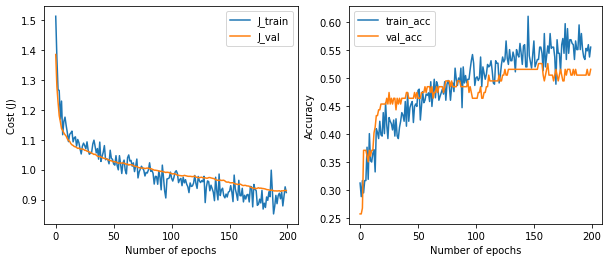

In [32]:
# implement your solution BELOW

earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',\
                                                       patience=10,  restore_best_weights=True)

history = cl_model.fit(x_train, y_onehot_train, validation_data=(x_val, y_onehot_val),\
                        batch_size=64, epochs=200, callbacks=[earlystopping_callback])

tr_losses = history.history['loss']
val_losses = history.history['val_loss']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(tr_losses, label="J_train")
plt.plot(val_losses, label="J_val")
plt.xlabel("Number of epochs")
plt.ylabel("Cost (J)")
plt.legend()

tr_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.subplot(1, 2, 2)
plt.plot(tr_accuracy, label="train_acc")
plt.plot(val_accuracy, label="val_acc")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

test_ce, test_acc = cl_model.evaluate(x_test, y_onehot_test, verbose=0)

pred = np.round(cl_model.predict(x_test))
test_balanced_acc = np.sum((pred - y_onehot_test) == 0 / y_onehot_test) / len(y_onehot_test)
print(test_balanced_acc)
# implement your solution ABOVE

tester.test('cl_model_learning', test_ce, test_acc, test_balanced_acc)
tester.print_all_tests_successful()